In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

In [2]:
raw_data = pd.read_csv('data/train.csv',
                       encoding = "ISO-8859-1",
                       sep=';',
                       skiprows=1,
                       names=['Дата','Количество поступивших вызовов',
                              'Количество принятых вызовов','Количество потерянных вызовов',
                              'Ср. скорость ответа оператора (сек.)','Ср. время разговора (сек.)',
                              'Ср. число операторов','Макс. число операторов'])
print(raw_data.shape)
raw_data.head(2)

(549, 8)


,Дата,Количество поступивших вызовов,Количество принятых вызовов,Количество потерянных вызовов,Ср. скорость ответа оператора (сек.),Ср. время разговора (сек.),Ср. число операторов,Макс. число операторов
0,01.03.2017,2142,1875,264,84,123,5,10
1,02.03.2017,1781,1736,43,23,117,6,11


In [3]:
target = pd.read_csv('data/submission_sample.csv',
                       encoding = "ISO-8859-1",
                       sep=';',
                       skiprows=1,
                       names=['Дата','Количество поступивших вызовов'])
print(target.shape)
target.head(2)

(61, 2)


,Дата,Количество поступивших вызовов
0,01.09.2018,0
1,02.09.2018,0


In [4]:
raw_data['Дата'] = pd.to_datetime(raw_data['Дата'], format='%d.%m.%Y')
target['Дата'] = pd.to_datetime(target['Дата'], format='%d.%m.%Y')

print(raw_data['Дата'].dtype)
print(target['Дата'].dtype)

datetime64[ns]
datetime64[ns]


In [5]:
print('train from ' + str(raw_data['Дата'].min()) + ' to '+ str(raw_data['Дата'].max()) )
print('target from ' + str(target['Дата'].min()) + ' to '+ str(target['Дата'].max()) )

train from 2017-03-01 00:00:00 to 2018-08-31 00:00:00
target from 2018-09-01 00:00:00 to 2018-10-31 00:00:00


In [6]:
raw_data.describe()

,Количество поступивших вызовов,Количество принятых вызовов,Количество потерянных вызовов,Ср. скорость ответа оператора (сек.),Ср. время разговора (сек.),Ср. число операторов,Макс. число операторов
count,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.00000
mean,1733.451730,1572.939891,156.848816,52.138434,127.604736,5.058288,11.59745
std,740.630635,609.173164,244.284560,57.156742,16.445732,1.481107,4.63721
min,465.000000,458.000000,3.000000,5.000000,72.000000,2.000000,3.00000
25%,1103.000000,998.000000,40.000000,19.000000,116.000000,4.000000,7.00000
50%,1818.000000,1706.000000,76.000000,31.000000,128.000000,5.000000,13.00000
75%,2113.000000,1938.000000,164.000000,65.000000,138.000000,6.000000,15.00000
max,5374.000000,3494.000000,2239.000000,402.000000,173.000000,8.000000,22.00000


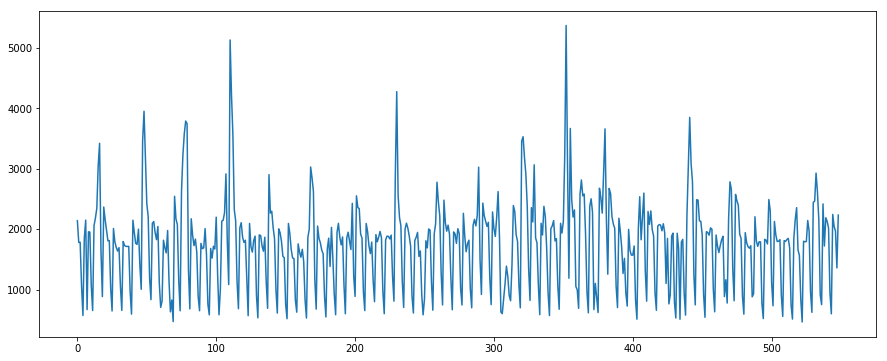

In [20]:
plt.figure(figsize=(15,6))
plt.plot(raw_data['Количество поступивших вызовов'])
plt.show()

Количество поступивших вызовов


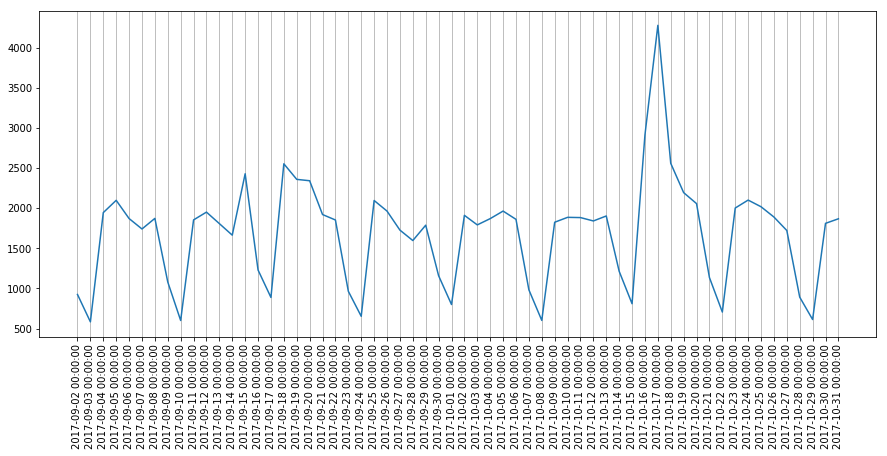

Количество принятых вызовов


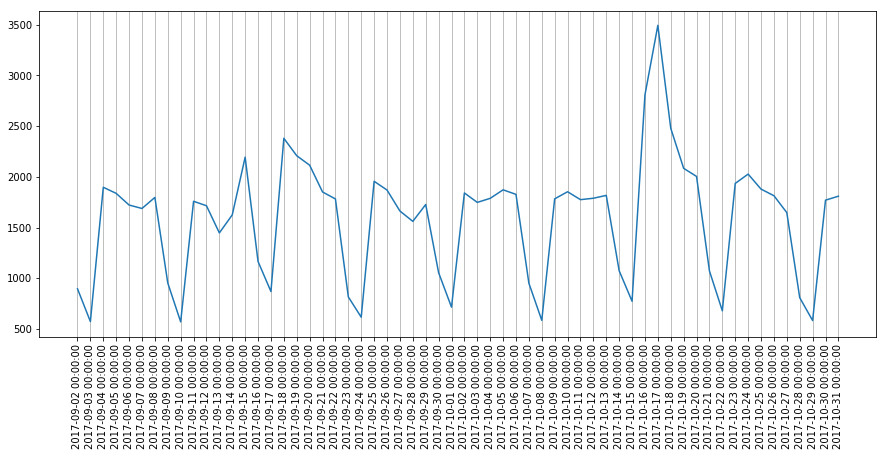

Количество потерянных вызовов


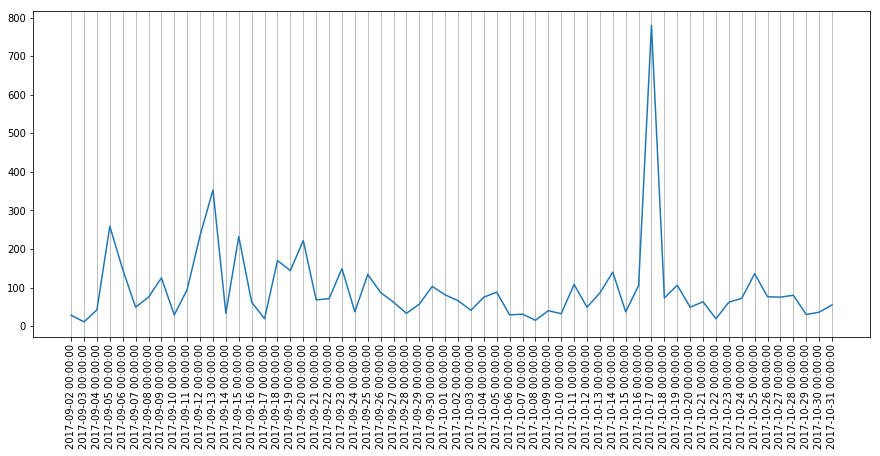

Ср. скорость ответа оператора (сек.)


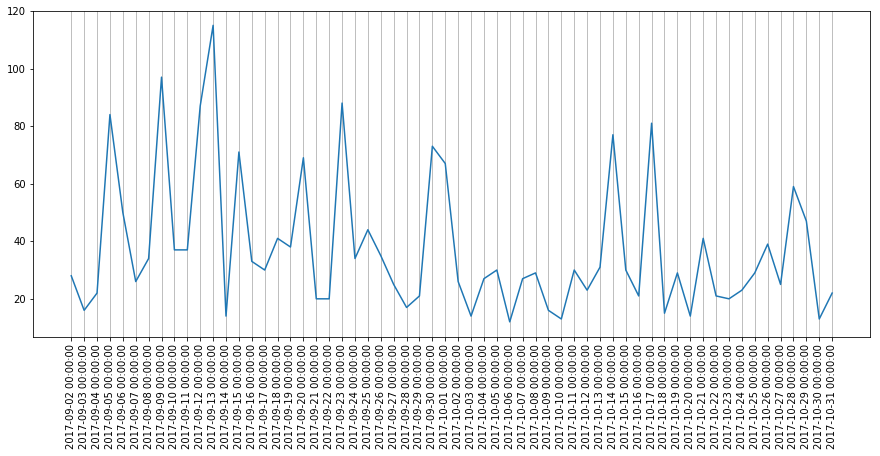

Ср. время разговора (сек.)


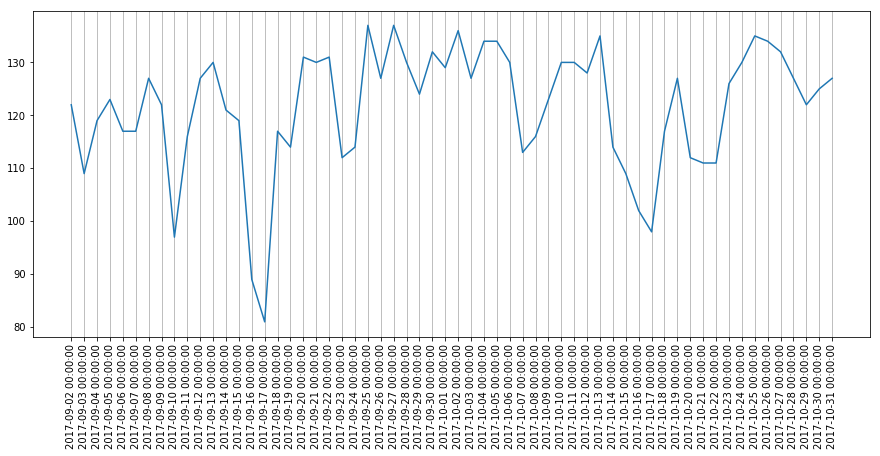

Ср. число операторов


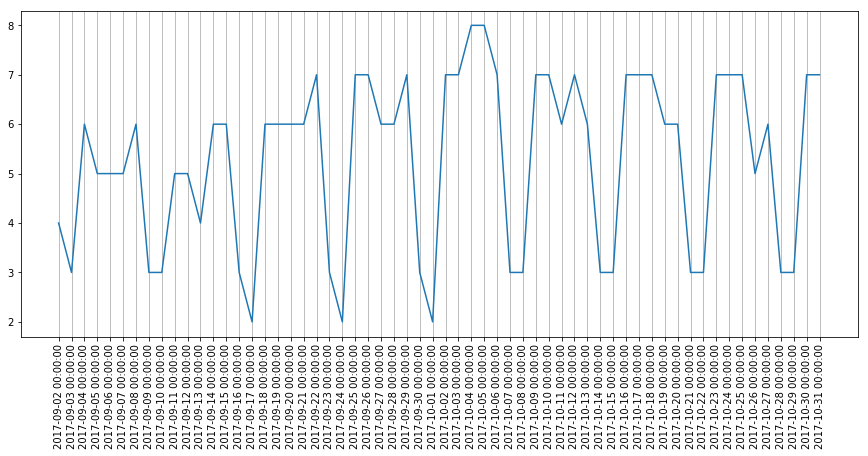

Макс. число операторов


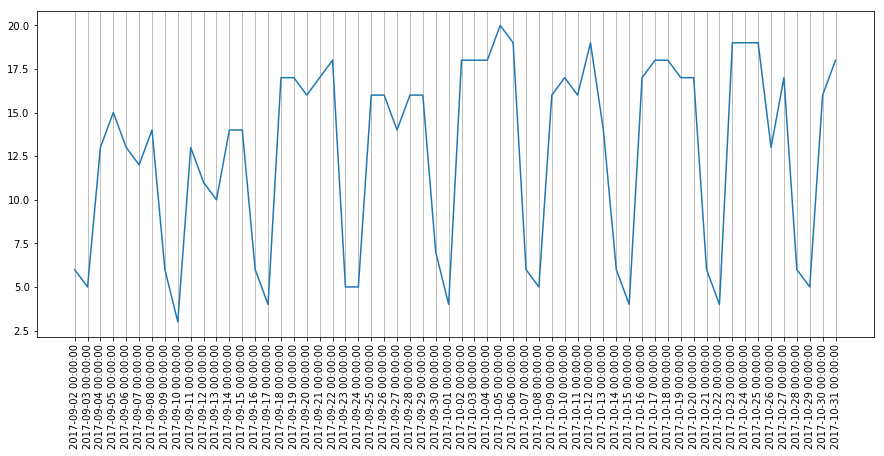

In [17]:
d=185
win=60
for col in raw_data.columns:
    if(col != 'Дата'):
        plt.figure(figsize=(15,6))
        print(col)
        plt.plot(raw_data[col][d:d+win])
        plt.xticks(np.arange(d,d+win),raw_data['Дата'][d:d+win], rotation=90)
        plt.gca().xaxis.grid(True)
        plt.show()

Количество поступивших вызовов
Количество поступивших вызовов


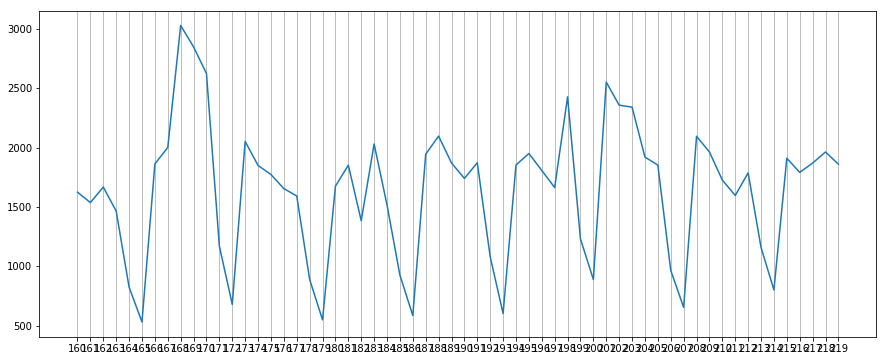

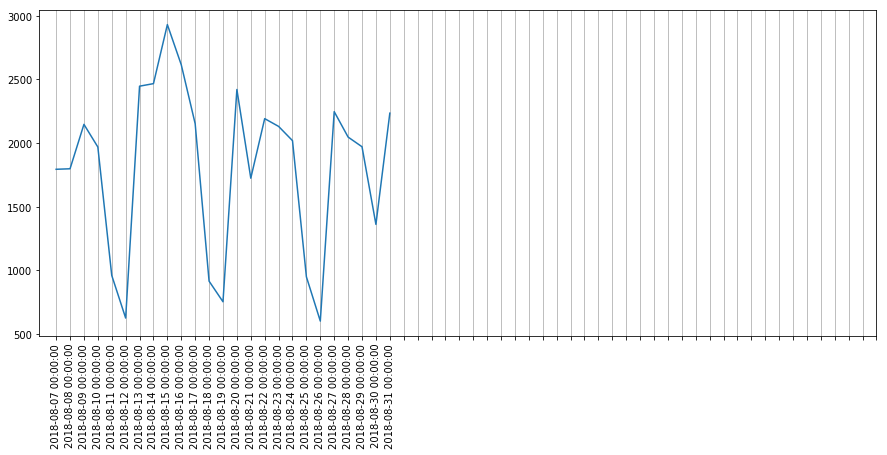

In [19]:
d=160
win=60
col = 'Количество поступивших вызовов'
plt.figure(figsize=(15,6))
print(col)
plt.plot(raw_data[col][d:d+win])
plt.xticks(np.arange(d,d+win) )#,raw_data['Дата'][d:d+win], rotation=90)
plt.gca().xaxis.grid(True)

d=d+364
col = 'Количество поступивших вызовов'
plt.figure(figsize=(15,6))
print(col)
plt.plot(raw_data[col][d:d+win])
plt.xticks(np.arange(d,d+win) ,raw_data['Дата'][d:d+win], rotation=90)
plt.gca().xaxis.grid(True)

plt.show()